In [53]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.sparse import diags, csr_matrix
from scipy.sparse.linalg import spsolve
from scipy.interpolate import interp1d

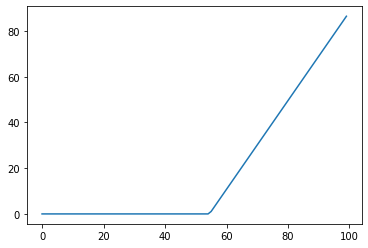

In [69]:
n = 100
r = 0.04
sigma = 0.3
strike_price = 110
stock_price = 100
max_stock_price = 200
t_max = 1

dt = 1 / 365
dx = lambda nx: nx * 0.1

alpha = lambda nx: (0.5 * sigma * sigma - r) * dt / 2 / dx(nx) + 0.5 * sigma * sigma * dt / dx(nx) / dx(nx)
beta = lambda nx: sigma * sigma * dt / dx(nx) / dx(nx) - r * dt
gamma = lambda nx: (r - 0.5 * sigma * sigma) * dt / 2 / dx(nx) + 0.5 * sigma * sigma * dt / dx(nx) / dx(nx)

a = alpha(np.arange(1, n))
b = 1 - beta(np.arange(1, n+1))
c = gamma(np.arange(1, n))

A = csr_matrix(diags([a, b, c], [-1, 0, 1]))

v_ftcs = np.maximum(np.linspace(0, max_stock_price, n) - strike_price, 0)
for i in range(int(t_max/dt)):
    v_ftcs = spsolve(A, v_ftcs)

plt.plot(range(n), v_ftcs)
plt.show()

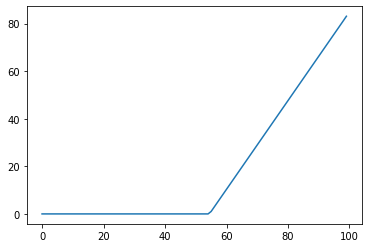

In [70]:
n = 100
r = 0.04
sigma = 0.3
strike_price = 110
stock_price = 100
max_stock_price = 200
t_max = 1

dt = 1 / 365
dx = lambda nx: nx * 0.1

alpha = lambda nx: (0.5 * sigma * sigma - r) * dt / 2 / dx(nx) + 0.5 * sigma * sigma * dt / dx(nx) / dx(nx)
beta = lambda nx: sigma * sigma * dt / dx(nx) / dx(nx) - r * dt
gamma = lambda nx: (r - 0.5 * sigma * sigma) * dt / 2 / dx(nx) + 0.5 * sigma * sigma * dt / dx(nx) / dx(nx)

a = alpha(np.arange(1, n))
b = 1 - beta(np.arange(1, n+1))
c = gamma(np.arange(1, n))
A = csr_matrix(diags([a, b, c], [-1, 0, 1]))

a = -alpha(np.arange(1, n))
b = 1 + beta(np.arange(1, n+1))
c = -gamma(np.arange(1, n))
B = csr_matrix(diags([a, b, c], [-1, 0, 1])).toarray()

# B = A.copy().toarray()
B_inv = la.inv(B)

C = csr_matrix(B_inv @ A.toarray())

v_cn = np.maximum(np.linspace(0, max_stock_price, n) - strike_price, 0)
for i in range(int(t_max/dt)):
    v_cn = spsolve(C, v_cn)

plt.plot(range(n), v_cn)
plt.show()

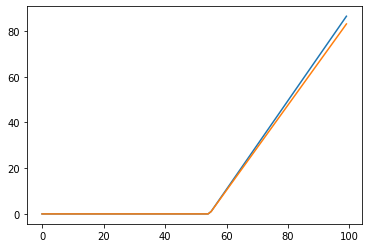

In [71]:
plt.plot(range(n), v_ftcs)
plt.plot(range(n), v_cn)
plt.show()